# Import Libraries

In [1]:
import numpy as np
import pandas as pd

# Loading the Data and Selecting the Features

## Import Data

In [2]:
loan_data_inputs_train = pd.read_csv('/content/drive/MyDrive/My Projects/Credit Risk Modeling/loan_data_inputs_train.csv', index_col=0)
loan_data_targets_train = pd.read_csv('/content/drive/MyDrive/My Projects/Credit Risk Modeling/loan_data_targets_train.csv', index_col=0)
loan_data_inputs_test = pd.read_csv('/content/drive/MyDrive/My Projects/Credit Risk Modeling/loan_data_inputs_test.csv', index_col=0)
loan_data_targets_test = pd.read_csv('/content/drive/MyDrive/My Projects/Credit Risk Modeling/loan_data_targets_test.csv', index_col=0)

## Explore Data

In [3]:
loan_data_inputs_train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,A5,...,1,0,0,1,0,0,0,0,0,0
206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,C1,...,0,0,0,1,0,0,0,0,0,0
136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,A5,...,0,0,0,1,0,0,0,0,0,0
412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,D1,...,0,0,0,1,0,0,0,0,0,0
36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,C2,...,0,1,0,1,0,0,0,0,0,0


In [4]:
loan_data_targets_train.head()

,good_bad
427211,1
206088,1
136020,1
412305,0
36159,0


In [5]:
loan_data_inputs_train.shape

(373028, 323)

In [6]:
loan_data_targets_train.shape

(373028, 1)

In [7]:
loan_data_inputs_test.shape

(93257, 323)

In [8]:
loan_data_targets_test.shape

(93257, 1)

## Selecting the Features

In [9]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [10]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [11]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


# PD Model Estimation

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [13]:
reg = LogisticRegression()

In [14]:
pd.options.display.max_rows = None

In [15]:
reg.fit(inputs_train, loan_data_targets_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [16]:
reg.intercept_

array([-0.31062024])

In [17]:
reg.coef_

array([[ 0.92865215,  0.69995173,  0.51619188,  0.33226407,  0.18244644,
         0.00511485,  0.0894017 ,  0.10684   ,  0.04633859,  0.07353655,
         0.06929661,  0.08352051,  0.09750887,  0.14180944,  0.11602497,
         0.19579996,  0.23915611,  0.24726853,  0.27220718,  0.34106081,
         0.50477232,  0.0819137 , -0.01224577,  0.27696337,  0.17467789,
         0.18036875,  0.24312512,  0.05101763,  0.07982619,  0.11011154,
         0.12906084,  0.09484708,  0.06810385,  0.12951609,  1.16640912,
         0.95225566,  0.86005024,  0.64717176,  0.47533147,  0.22512665,
        -0.02370253,  0.94100373,  0.61204892,  0.34911028,  0.14776846,
         0.071609  ,  0.05315857,  0.09877325,  0.13563208,  0.13832576,
        -0.09514514, -0.11571313,  0.28603389,  0.13751375, -0.07268373,
         0.04665295, -0.02872778, -0.0527635 , -0.05463527, -0.07034487,
        -0.01981756, -0.07127393,  0.13319544,  0.06939743, -0.02014826,
         0.0405614 ,  0.1657351 ,  0.05717121,  0.0

In [18]:
feature_name = inputs_train.columns.values

In [19]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.310620
1,grade:A,0.928652
2,grade:B,0.699952
3,grade:C,0.516192
4,grade:D,0.332264
5,grade:E,0.182446
6,grade:F,0.005115
7,home_ownership:OWN,0.089402
8,home_ownership:MORTGAGE,0.106840
9,addr_state:NM_VA,0.046339


## Build a Logistic Regression Model with P-Values

In [20]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:

    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [21]:
reg = LogisticRegression_with_p_values()

In [22]:
reg.fit(inputs_train, loan_data_targets_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.310620
1,grade:A,0.928652
2,grade:B,0.699952
3,grade:C,0.516192
4,grade:D,0.332264
5,grade:E,0.182446
6,grade:F,0.005115
7,home_ownership:OWN,0.089402
8,home_ownership:MORTGAGE,0.106840
9,addr_state:NM_VA,0.046339


In [24]:
p_values = reg.p_values

In [25]:
p_values = np.append(np.nan, np.array(p_values))

In [26]:
summary_table['p_values'] = p_values

In [27]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.310620,NaN
1,grade:A,0.928652,1.109906e-23
2,grade:B,0.699952,4.820927e-29
3,grade:C,0.516192,7.257055e-19
4,grade:D,0.332264,1.981977e-09
5,grade:E,0.182446,2.425595e-04
6,grade:F,0.005115,9.212425e-01
7,home_ownership:OWN,0.089402,1.117545e-05
8,home_ownership:MORTGAGE,0.106840,6.561856e-17
9,addr_state:NM_VA,0.046339,1.504477e-01


In [28]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [29]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [30]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [31]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
feature_name = inputs_train.columns.values

In [33]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-0.378230
1,grade:A,0.935678
2,grade:B,0.708794
3,grade:C,0.521292
4,grade:D,0.331610
5,grade:E,0.182667
6,grade:F,-0.002208
7,home_ownership:OWN,0.082124
8,home_ownership:MORTGAGE,0.099605
9,addr_state:NM_VA,0.029785


In [34]:
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.378230,NaN
1,grade:A,0.935678,4.460346e-24
2,grade:B,0.708794,6.271303e-30
3,grade:C,0.521292,2.122017e-19
4,grade:D,0.331610,1.566573e-09
5,grade:E,0.182667,1.834637e-04
6,grade:F,-0.002208,9.652236e-01
7,home_ownership:OWN,0.082124,5.155579e-05
8,home_ownership:MORTGAGE,0.099605,5.309357e-15
9,addr_state:NM_VA,0.029785,3.533461e-01


In [35]:
import pickle

In [36]:
pickle.dump(reg2, open('/content/drive/MyDrive/My Projects/Credit Risk Modeling/pd_model.sav', 'wb'))

# PD Model Validation (Test)

## Out-of-sample validation

In [37]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[:, ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [38]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [39]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [40]:
y_hat_test = reg2.model.predict(inputs_test)

In [41]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [42]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [43]:
y_hat_test_proba

array([[0.07389193, 0.92610807],
       [0.14369515, 0.85630485],
       [0.11265991, 0.88734009],
       ...,
       [0.02641769, 0.97358231],
       [0.03938109, 0.96061891],
       [0.04743156, 0.95256844]])

In [44]:
y_hat_test_proba[:][:,1]

array([0.92610807, 0.85630485, 0.88734009, ..., 0.97358231, 0.96061891,
       0.95256844])

In [45]:
y_hat_test_proba = y_hat_test_proba[:][:,1]

In [46]:
y_hat_test_proba

array([0.92610807, 0.85630485, 0.88734009, ..., 0.97358231, 0.96061891,
       0.95256844])

In [47]:
loan_data_targets_test_temp = loan_data_targets_test

In [48]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [49]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [50]:
df_actual_predicted_probs.shape

(93257, 2)

In [51]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [52]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [53]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.926108
288564,1,0.856305
213591,1,0.887340
263083,1,0.942771
165001,1,0.968024


## Accuaracy and Area under the Curve

In [54]:
tr = 0.5
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1,0)

In [55]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,1,10016
1,1,83239


In [56]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.000011,0.107402
1,0.000011,0.892576


In [57]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
             rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0,0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
                                                                                                                             rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1,1]

0.8925871516347299

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score

In [59]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99990017, 0.99990017,
        1.        ]),
 array([0.00000000e+00, 1.20134551e-05, 8.40941855e-05, ...,
        9.99987987e-01, 1.00000000e+00, 1.00000000e+00]),
 array([       inf, 0.99303888, 0.99134793, ..., 0.50460695, 0.49490472,
        0.49337168]))

In [60]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                                 df_actual_predicted_probs['y_hat_test_proba'])

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

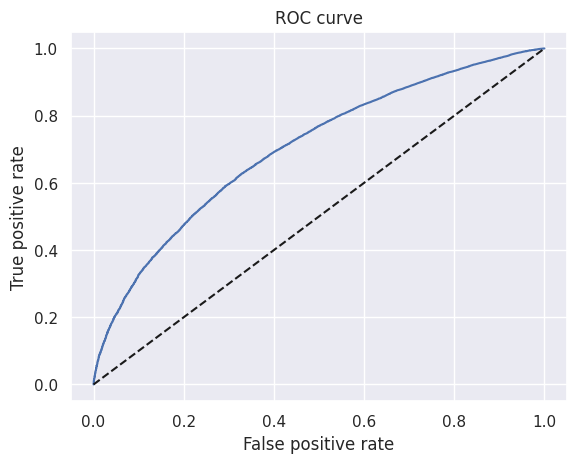

In [62]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [63]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.7029489518227471

## Gini and Kolmogorov-Smirnov

In [64]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [65]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
11208,0,0.493372,0
118702,1,0.494905,0
210472,0,0.504607,1
41663,1,0.514949,1
2808,0,0.519432,1


In [66]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [67]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,11208,0,0.493372,0
1,118702,1,0.494905,0
2,210472,0,0.504607,1
3,41663,1,0.514949,1
4,2808,0,0.519432,1


In [68]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()

In [69]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,11208,0,0.493372,0,1,0,1
1,118702,1,0.494905,0,2,1,1
2,210472,0,0.504607,1,3,1,2
3,41663,1,0.514949,1,4,2,2
4,2808,0,0.519432,1,5,2,3


In [70]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())

In [71]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
93252,249597,1,0.991442,1,93253,83236,10017,0.999957,0.999952,1.0
93253,231463,1,0.991488,1,93254,83237,10017,0.999968,0.999964,1.0
93254,239228,1,0.992034,1,93255,83238,10017,0.999979,0.999976,1.0
93255,261086,1,0.992492,1,93256,83239,10017,0.999989,0.999988,1.0
93256,242624,1,0.993039,1,93257,83240,10017,1.000000,1.000000,1.0


Text(0.5, 1.0, 'Gini')

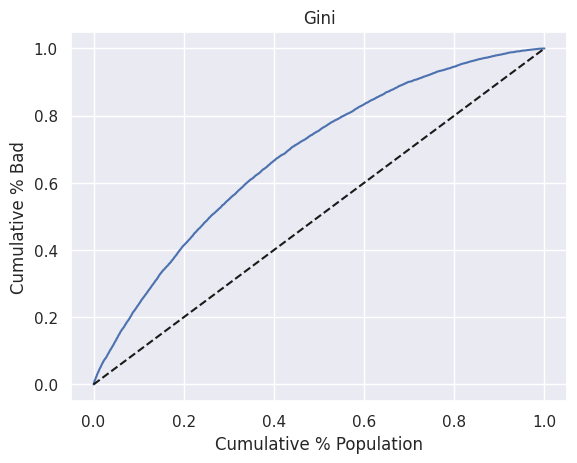

In [72]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [73]:
Gini = AUROC * 2 - 1
Gini

0.40589790364549416

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

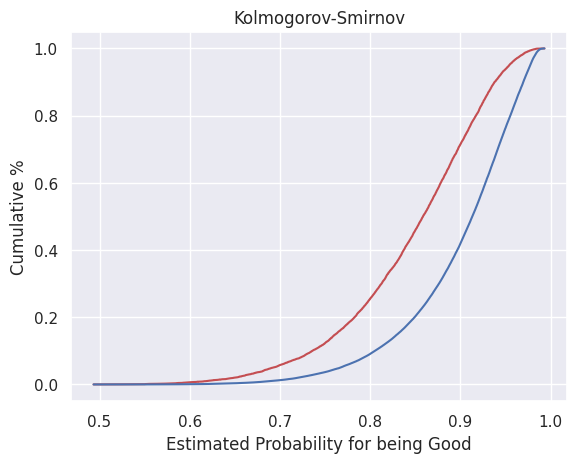

In [74]:
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [75]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.298864934177012

# Applying the PD Model

## Calculating PD of individual account

In [76]:
pd.options.display.max_columns = None

In [77]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [78]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.378230,NaN
1,grade:A,0.935678,4.460346e-24
2,grade:B,0.708794,6.271303e-30
3,grade:C,0.521292,2.122017e-19
4,grade:D,0.331610,1.566573e-09
5,grade:E,0.182667,1.834637e-04
6,grade:F,-0.002208,9.652236e-01
7,home_ownership:OWN,0.082124,5.155579e-05
8,home_ownership:MORTGAGE,0.099605,5.309357e-15
9,addr_state:NM_VA,0.029785,3.533461e-01


In [79]:
y_hat_test_proba

array([0.92610807, 0.85630485, 0.88734009, ..., 0.97358231, 0.96061891,
       0.95256844])

# Creating a Scorecard

In [80]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-0.378230,NaN
1,grade:A,0.935678,4.460346e-24
2,grade:B,0.708794,6.271303e-30
3,grade:C,0.521292,2.122017e-19
4,grade:D,0.331610,1.566573e-09
5,grade:E,0.182667,1.834637e-04
6,grade:F,-0.002208,9.652236e-01
7,home_ownership:OWN,0.082124,5.155579e-05
8,home_ownership:MORTGAGE,0.099605,5.309357e-15
9,addr_state:NM_VA,0.029785,3.533461e-01


In [81]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [94]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [95]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-0.378230,NaN
1,1,grade:A,0.935678,4.460346e-24
2,2,grade:B,0.708794,6.271303e-30
3,3,grade:C,0.521292,2.122017e-19
4,4,grade:D,0.331610,1.566573e-09
5,5,grade:E,0.182667,1.834637e-04
6,6,grade:F,-0.002208,9.652236e-01
7,7,home_ownership:OWN,0.082124,5.155579e-05
8,8,home_ownership:MORTGAGE,0.099605,5.309357e-15
9,9,addr_state:NM_VA,0.029785,3.533461e-01


In [96]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]

In [97]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-0.378230,NaN,Intercept
1,1,grade:A,0.935678,4.460346e-24,grade
2,2,grade:B,0.708794,6.271303e-30,grade
3,3,grade:C,0.521292,2.122017e-19,grade
4,4,grade:D,0.331610,1.566573e-09,grade
5,5,grade:E,0.182667,1.834637e-04,grade
6,6,grade:F,-0.002208,9.652236e-01,grade
7,7,home_ownership:OWN,0.082124,5.155579e-05,home_ownership
8,8,home_ownership:MORTGAGE,0.099605,5.309357e-15,home_ownership
9,9,addr_state:NM_VA,0.029785,3.533461e-01,addr_state


In [98]:
min_score = 300
max_score = 850

In [99]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

,Coefficients
Original feature name,
Intercept,-0.378230
acc_now_delinq,0.000000
addr_state,0.000000
annual_inc,-0.196900
dti,-0.125885
emp_length,0.000000
grade,-0.002208
home_ownership,0.000000
initial_list_status,0.000000


In [100]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-0.9018209398072828

In [101]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()

,Coefficients
Original feature name,
Intercept,-0.378230
acc_now_delinq,0.158231
addr_state,0.507134
annual_inc,0.455331
dti,0.201422
emp_length,0.136266
grade,0.935678
home_ownership,0.099605
initial_list_status,0.052502


In [102]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

5.5960195238737445

In [105]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-0.378230,NaN,Intercept,-32.014714
1,1,grade:A,0.935678,4.460346e-24,grade,79.199057
2,2,grade:B,0.708794,6.271303e-30,grade,59.994788
3,3,grade:C,0.521292,2.122017e-19,grade,44.124024
4,4,grade:D,0.331610,1.566573e-09,grade,28.068609
5,5,grade:E,0.182667,1.834637e-04,grade,15.461560
6,6,grade:F,-0.002208,9.652236e-01,grade,-0.186870
7,7,home_ownership:OWN,0.082124,5.155579e-05,home_ownership,6.951244
8,8,home_ownership:MORTGAGE,0.099605,5.309357e-15,home_ownership,8.430945
9,9,addr_state:NM_VA,0.029785,3.533461e-01,addr_state,2.521108


In [107]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

<ipython-input-107-f69c049793b7>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_sco

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-0.378230,NaN,Intercept,344.318573
1,1,grade:A,0.935678,4.460346e-24,grade,79.199057
2,2,grade:B,0.708794,6.271303e-30,grade,59.994788
3,3,grade:C,0.521292,2.122017e-19,grade,44.124024
4,4,grade:D,0.331610,1.566573e-09,grade,28.068609
5,5,grade:E,0.182667,1.834637e-04,grade,15.461560
6,6,grade:F,-0.002208,9.652236e-01,grade,-0.186870
7,7,home_ownership:OWN,0.082124,5.155579e-05,home_ownership,6.951244
8,8,home_ownership:MORTGAGE,0.099605,5.309357e-15,home_ownership,8.430945
9,9,addr_state:NM_VA,0.029785,3.533461e-01,addr_state,2.521108


In [108]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-0.378230,NaN,Intercept,344.318573,344.0
1,1,grade:A,0.935678,4.460346e-24,grade,79.199057,79.0
2,2,grade:B,0.708794,6.271303e-30,grade,59.994788,60.0
3,3,grade:C,0.521292,2.122017e-19,grade,44.124024,44.0
4,4,grade:D,0.331610,1.566573e-09,grade,28.068609,28.0
5,5,grade:E,0.182667,1.834637e-04,grade,15.461560,15.0
6,6,grade:F,-0.002208,9.652236e-01,grade,-0.186870,-0.0
7,7,home_ownership:OWN,0.082124,5.155579e-05,home_ownership,6.951244,7.0
8,8,home_ownership:MORTGAGE,0.099605,5.309357e-15,home_ownership,8.430945,8.0
9,9,addr_state:NM_VA,0.029785,3.533461e-01,addr_state,2.521108,3.0


In [109]:
min_sum_coef_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_coef_prel

300.0

In [110]:
max_sum_coef_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
max_sum_coef_prel

849.0

In [111]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,-0.378230,NaN,Intercept,344.318573,344.0,-0.318573
1,1,grade:A,0.935678,4.460346e-24,grade,79.199057,79.0,-0.199057
2,2,grade:B,0.708794,6.271303e-30,grade,59.994788,60.0,0.005212
3,3,grade:C,0.521292,2.122017e-19,grade,44.124024,44.0,-0.124024
4,4,grade:D,0.331610,1.566573e-09,grade,28.068609,28.0,-0.068609
5,5,grade:E,0.182667,1.834637e-04,grade,15.461560,15.0,-0.461560
6,6,grade:F,-0.002208,9.652236e-01,grade,-0.186870,-0.0,0.186870
7,7,home_ownership:OWN,0.082124,5.155579e-05,home_ownership,6.951244,7.0,0.048756
8,8,home_ownership:MORTGAGE,0.099605,5.309357e-15,home_ownership,8.430945,8.0,-0.430945
9,9,addr_state:NM_VA,0.029785,3.533461e-01,addr_state,2.521108,3.0,0.478892


In [121]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][42] = 81
df_scorecard

<ipython-input-121-aaf111cba5c6>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_scorecard['Score - Final'][42] = 81
<ipython-input-121-aaf111cba5c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-0.378230,NaN,Intercept,344.318573,344.0,-0.318573,344.0
1,1,grade:A,0.935678,4.460346e-24,grade,79.199057,79.0,-0.199057,79.0
2,2,grade:B,0.708794,6.271303e-30,grade,59.994788,60.0,0.005212,60.0
3,3,grade:C,0.521292,2.122017e-19,grade,44.124024,44.0,-0.124024,44.0
4,4,grade:D,0.331610,1.566573e-09,grade,28.068609,28.0,-0.068609,28.0
5,5,grade:E,0.182667,1.834637e-04,grade,15.461560,15.0,-0.461560,15.0
6,6,grade:F,-0.002208,9.652236e-01,grade,-0.186870,-0.0,0.186870,-0.0
7,7,home_ownership:OWN,0.082124,5.155579e-05,home_ownership,6.951244,7.0,0.048756,7.0
8,8,home_ownership:MORTGAGE,0.099605,5.309357e-15,home_ownership,8.430945,8.0,-0.430945,8.0
9,9,addr_state:NM_VA,0.029785,3.533461e-01,addr_state,2.521108,3.0,0.478892,3.0


In [122]:
max_sum_coef_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
max_sum_coef_prel

850.0

# Calculating Credit Score

In [123]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [124]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat.copy()

In [125]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [126]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [127]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

In [128]:
scorecard_scores = df_scorecard['Score - Final']

In [130]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [131]:
scorecard_scores.shape

(102,)

In [132]:
scorecard_scores = scorecard_scores.values.reshape(102, 1)

In [133]:
scorecard_scores.shape

(102, 1)

In [134]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [135]:
y_scores.head()

,0
362514,591.0
288564,527.0
213591,551.0
263083,613.0
165001,664.0


# From Credit Score to PD

In [136]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [138]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (1 + np.exp(sum_coef_from_score))
y_hat_proba_from_score.head()

,0
362514,0.926636
288564,0.855699
213591,0.887310
263083,0.942462
165001,0.967660


# Setting Cut-offs

In [139]:
from sklearn.metrics import roc_curve, roc_auc_score

In [140]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99990017, 0.99990017,
        1.        ]),
 array([0.00000000e+00, 1.20134551e-05, 8.40941855e-05, ...,
        9.99987987e-01, 1.00000000e+00, 1.00000000e+00]),
 array([       inf, 0.99303888, 0.99134793, ..., 0.50460695, 0.49490472,
        0.49337168]))

In [141]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                                 df_actual_predicted_probs['y_hat_test_proba'])

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

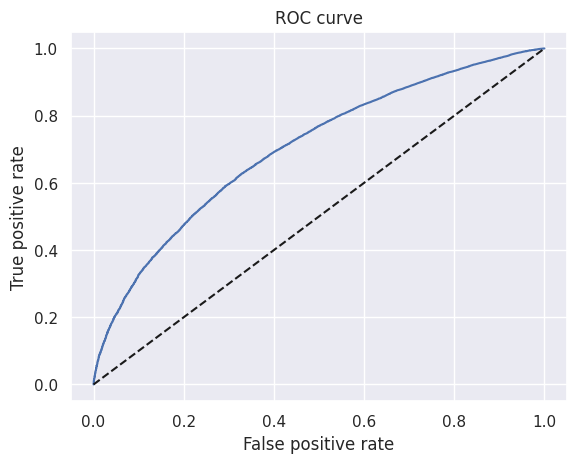

In [143]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [144]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.7029489518227471

In [145]:
thresholds

array([       inf, 0.99303888, 0.99134793, ..., 0.50460695, 0.49490472,
       0.49337168])

In [146]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
df_cutoffs.head()

,thresholds,fpr,tpr
0,inf,0.0000,0.000000
1,0.993039,0.0000,0.000012
2,0.991348,0.0000,0.000084
3,0.991307,0.0001,0.000084
4,0.989848,0.0001,0.000577


In [148]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)

<ipython-input-148-78b92e8d0a90>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)


In [151]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.000000,0.0000,0.000000
1,0.993039,0.0000,0.000012
2,0.991348,0.0000,0.000084
3,0.991307,0.0001,0.000084
4,0.989848,0.0001,0.000577


In [152]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * (max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score

In [153]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.0000,0.000000,3485.864896
1,0.993039,0.0000,0.000012,796.201372
2,0.991348,0.0000,0.000084,777.650750
3,0.991307,0.0001,0.000084,777.245130
4,0.989848,0.0001,0.000577,763.990832


In [154]:
df_cutoffs['Score'][0] = max_score

<ipython-input-154-59a0fc4d7517>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_cutoffs['Score'][0] = max_score


In [155]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.0000,0.000000,850.000000
1,0.993039,0.0000,0.000012,796.201372
2,0.991348,0.0000,0.000084,777.650750
3,0.991307,0.0001,0.000084,777.245130
4,0.989848,0.0001,0.000577,763.990832


In [156]:
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [157]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = df_cutoffs['N Rejected'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]

In [158]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.0000,0.000000,850.000000,0,93257,0.000000,1.000000
1,0.993039,0.0000,0.000012,796.201372,1,93256,0.000011,0.999989
2,0.991348,0.0000,0.000084,777.650750,7,93250,0.000075,0.999925
3,0.991307,0.0001,0.000084,777.245130,8,93249,0.000086,0.999914
4,0.989848,0.0001,0.000577,763.990832,49,93208,0.000525,0.999475


In [159]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
17035,0.519432,0.9998,0.999976,382.915618,93253,4,0.999957,0.000043
17036,0.514949,0.9998,0.999988,381.396133,93254,3,0.999968,0.000032
17037,0.504607,0.9999,0.999988,377.893125,93255,2,0.999979,0.000021
17038,0.494905,0.9999,1.000000,374.608097,93256,1,0.999989,0.000011
17039,0.493372,1.0000,1.000000,374.088977,93257,0,1.000000,0.000000


In [160]:
df_cutoffs.iloc[1000: 2000,]

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.954009,0.049616,0.208037,632.992490,17814,75443,0.191021,0.808979
1001,0.954009,0.049715,0.208037,632.991400,17815,75442,0.191031,0.808969
1002,0.953982,0.049715,0.208289,632.939500,17836,75421,0.191256,0.808744
1003,0.953976,0.049815,0.208289,632.927267,17837,75420,0.191267,0.808733
1004,0.953968,0.049815,0.208349,632.911773,17842,75415,0.191321,0.808679
1005,0.953964,0.049915,0.208349,632.905261,17843,75414,0.191331,0.808669
1006,0.953935,0.049915,0.208566,632.848236,17861,75396,0.191524,0.808476
1007,0.953934,0.050015,0.208566,632.846723,17862,75395,0.191535,0.808465
1008,0.953928,0.050015,0.208650,632.835548,17869,75388,0.191610,0.808390
1009,0.953927,0.050115,0.208650,632.832847,17870,75387,0.191621,0.808379


In [161]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [162]:
df_scorecard.to_csv('df_scorecard.csv')